In [7]:
from skimage.feature import hog
import numpy
import matplotlib.pyplot as plt

In [8]:
def load_image(event, channels=None):
    from PIL import Image
    
    """
    Load an image from a certain path

    Args:
        path (str): path of image
        channels (list, optional): image channels to load. Defaults to None.

    Returns:
        dict: dictionary containing pixel values (ndarray) and path for each image
    """
    im = Image.open(event["path"])

    if channels is None:
        channels = range(im.n_frames)

    arr = numpy.empty(shape=(len(channels), im.height, im.width), dtype=float)
    for i in channels:
        im.seek(i)
        arr[i] = numpy.array(im)
    return dict(pixels=arr, path=event["path"], idx=event["idx"])

In [134]:
tiff = load_image(dict(path="/data/Experiment_data/VIB/Vulcan/Slava_PBMC/images_subset/pbmc+PI_00000004.tiff", idx=0))

In [140]:
tiff["pixels"][0].shape

(25, 104)

In [216]:
features, viz = hog(tiff["pixels"][0], orientations=4, pixels_per_cell=(4,4), cells_per_block=(1,1), visualize=True, feature_vector=False)

In [217]:
tiff["pixels"][0].size

2600

In [218]:
features.size

624

In [219]:
features.shape

(6, 26, 1, 1, 4)

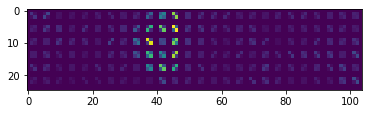

In [220]:
plt.imshow(viz)